In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_local = pd.read_excel('附件1：长春市COVID-19疫情期间病毒感染人数数据.xlsx',sheet_name='新增本土感染者')
data_asy = pd.read_excel('附件1：长春市COVID-19疫情期间病毒感染人数数据.xlsx',sheet_name='新增无症状感染者')
data_local = data_local.fillna(0)
data_asy = data_asy.fillna(0)
data_local = data_local.drop(len(data_local)-1)
data_asy = data_asy.drop(len(data_asy)-1)
data_local

,区域编号,A,B,C,D,E,F,G,H,I,...,宽城区,南关区,汽开区,二道区,莲花山区,Unnamed: 23,公主岭市,德惠市,榆树市,农安县
0,3月4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3月5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3月6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3月7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3月8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,5月19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,5月20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,5月21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,5月22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
data_asy
data_all = data_asy['全市总计']+data_local['全市总计']
rate = np.asarray(data_local['区域编号'])
# rate_asy = np.asarray(data_asy['区域'])

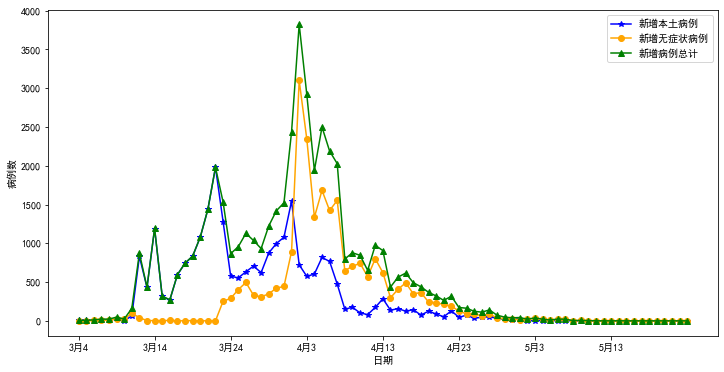

In [59]:
plt.figure(figsize=(12,6))
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(rate,data_local['全市总计'],'-*',label='新增本土病例',c='b')
plt.plot(rate,data_asy['全市总计'],'-o',label='新增无症状病例',c='orange')
plt.plot(rate,data_all,'-^',label='新增病例总计',c='g')
plt.legend(loc='best')
plt.xticks(range(0,80,10))
plt.xlabel('日期')
plt.ylabel('病例数')
plt.savefig('新增病例图.png')

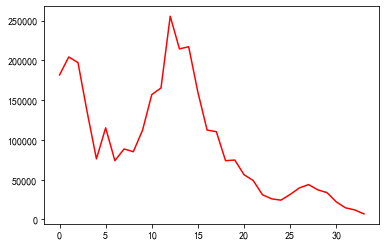

In [6]:
veg = pd.read_excel('长春市发放蔬菜包日期.xlsx')
data_all_slice = data_all.iloc[25:59,]
# data_asy_slice = data_asy.iloc[25:59,]
plt.plot(veg['已发放蔬菜包总量'],c='r')

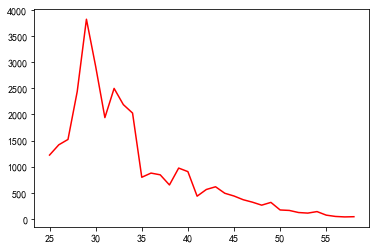

In [7]:
plt.plot(data_all_slice,c='r')

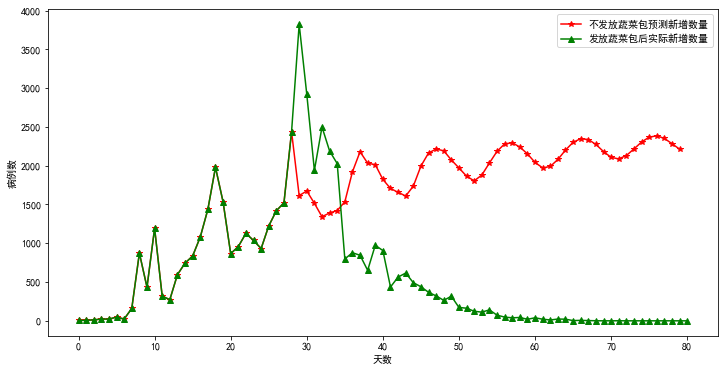

In [91]:
# 使用自回归模型预测如果没有发放蔬菜包新增病例人数的数量
from statsmodels.tsa.ar_model import AR 
from random import random

data_before = data_all.iloc[0:29,]
data_before = np.array(data_before).tolist()

# 建立模型
model = AR(data_before)
model_fit = model.fit()
# 做出预测
yhat = model_fit.predict(len(data_before), len(data_before)+50)
yhat
for i in range(len(yhat)):
    data_before.append(yhat[i])
data_before
plt.figure(figsize=(12,6))
plt.plot(data_before,'-*',c='r',label='不发放蔬菜包预测新增数量')
plt.plot(data_all,'-^',c='g',label='发放蔬菜包后实际新增数量')
plt.legend(loc='best')
plt.xlabel('天数')
plt.ylabel('病例数')
plt.savefig('预测数量与实际数量.png')